# ISSS609 Text Analytics and Applications
## IMBD Movie Review - Sentiment Analysis
### G1 - Group 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords, wordnet
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
# Modelling
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from text_analytics.config import RAW_DATA_PATH, SENTIMENT_CLEANED_DATA_PATH

In [3]:
df  = pd.read_parquet(RAW_DATA_PATH)
df.head(3)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [8]:
df = df[~df.duplicated()]
df.shape

(49582, 2)

In [9]:
df.review = df.review.replace(r"<.*?>"," ", regex=True)
df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive


In [10]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

## 1. VADER

### 1.1. Apply Vader 

In [11]:
try: 
    SIA = SentimentIntensityAnalyzer()
except: 
    nltk.download("vader_lexicon") 
    SIA = SentimentIntensityAnalyzer()

def mapper(data):
    if data > 0:
        return "positive"
    else:
        return "negative"

def sentiment_analysis(df, colm_name):
    df_out = df.copy()
    df_out['polarity_scores'] = df_out[colm_name].apply(lambda w: SIA.polarity_scores(w))
    # picking only compound score(combined score)
    df_out['compound_score'] = df_out['polarity_scores'].apply(lambda x: x['compound'])
    # mapping the compound score to positive, negative
    df_out['vader_sentiment'] = df_out['compound_score'].apply(mapper)
    
    return df_out

In [12]:
df_vader = sentiment_analysis(df, 'review')
df_vader.head(3)

,review,sentiment,polarity_scores,compound_score,vader_sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"{'neg': 0.206, 'neu': 0.745, 'pos': 0.049, 'compound': -0.9951}",-0.9951,negative
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,"{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'compound': 0.9641}",0.9641,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love. This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman. This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,"{'neg': 0.093, 'neu': 0.689, 'pos': 0.218, 'compound': 0.978}",0.9780,positive


In [13]:
print(confusion_matrix(df_vader['sentiment'],df_vader['vader_sentiment']))
print(classification_report(df_vader['sentiment'],df_vader['vader_sentiment'], digits = 3))

[[13289 11409]
 [ 3552 21332]]
              precision    recall  f1-score   support

    negative      0.789     0.538     0.640     24698
    positive      0.652     0.857     0.740     24884

    accuracy                          0.698     49582
   macro avg      0.720     0.698     0.690     49582
weighted avg      0.720     0.698     0.690     49582



### 1.2. VADER Error Analysis

In [14]:
print('FP cases')
# get FP cases (predicted as positve but actually negative) and sort the predicted compound score in descending order
FP = df_vader[(df_vader['vader_sentiment']=='positive') & (df_vader['sentiment']=='negative')].sort_values('compound_score', ascending=False)
display(FP[:3])
print('FN cases')
# get FN cases (predicted as 1 star but actually 5 stars) and sort the predicted compound in ascending order
FN = df_vader[(df_vader['vader_sentiment']=='negative') & (df_vader['sentiment']=='positive')].sort_values('compound_score')
display(FN[:3])

FP cases


review  \
410                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 I firmly believe that the best Oscar ceremony in recent years was in 2003 for two reasons:   1 ) Host Steve Martin was at his most wittiest: " I saw the teamsters help Michael Moore into the trunk of his limo " and " I'll better not mention the gay mafia in case I wake up with a poodle's head in my bed "   2 ) Surprise winners: No one had Adrien Brody down for best actor ( Genuine applause ) or Roman Polanski for best director ( Genuine jeers and boos ) but they won   Last year's award ceremony wasn't too bad but there was little in the way of surprises and I was happy to see RETURN OF THE KING sweep the awards even if it wasn't the best in the trilogy ( FELLOWSHIP was much better )but what let the BBC coverage down was Jonathan Ross getting a few of his sycophantic mates round and pretending they were hilarious when they were anything but . So when I heard Sky were doing the coverage for British TV I was expecting Barry Norman and Mark Kermode to be doing the links , but instead we ended up with Jamie Theakston and Sharon Osbourne ! Oh gawd if British TV are desperate for film critics ( Obviously they are ) I'm sure both Bob The Moo and Theo Robertson will happily fly over to LA to give their honest opinions on the winners and losers   Chris Rock wasn't too bad , but he's no Steve Martin while the location seemed to resemble a sports hall with seats put in ! Not much of a glitzy arena in my opinion . The main problem I had with the ceremony was the format with the " minor " Oscars handed out to the winners who were sitting in their seats ! There's no such thing as a " minor " Oscar and just because the award is for Best Animated Short or Best Costume Design they're as well deserved as Best Picture or Best Director . All the winners should be allowed to march up to the podium . What a bunch of arrogant snobs the Academy are becoming and I quite agree with the comments that this format is disgraceful and if it wasn't for the surprises this could possibly have been the worst ceremony in history . As for the awards themselves   Best Supporting Actress - Cate Blanchett . No great surprise for a competitive category   Best Suppor

FN cases


review  \
45221                                                                                                                                                                                                                               "Nobi" or "Fires On the Plain" is a film that is so excellent on so many levels, that not enough good things can be said about it. My only regret is that I was not able to see this 1959 film sooner.  Being something of a film purist, I tend to look at films for their artistic merits based upon dialog, acting, photography and even the efforts to remain true to the period in terms of costume. Ultimately, I want to know if the film is "truthful" enough in revealing the human condition to make me think without oppressing me with what the director wants me to think.  "Fires on the Plain" is a great film because it crafts a portrait filled with realistic human reactions to the dying fires of a great historical catastrophe.  Ichikawa's film is a condemnation of war on all levels -- as any good war film should be. War is horrifying, bloody, destructive. It is also murderous on the psyche. However, what is fundamental about "Fires on the Plain" is its unapologetic look at the Japanese soldiers. It shows them slowly collapsing under the weight of superior American firepower and their nation's inability to wage a war of its own making. A fatalistic code encouraging death before surrender is at the heart of this madness.  I was astonished to see such an honest and brutally close look at the bitter fruits of Japan's military misadventure made just 14 years after the end of what the Japanese call the "Great Pacific War." Ichikawa, reveals what the Germans called the "war life," the plight of the common soldier.  Ichikawa's film is interesting, since even today Japan is having a hard time fully coming to terms with its wartime fanaticism, its subjugation of conquered peoples, the racism of its war against the Chinese and war crimes which included cannibalism by soldiers and officers practiced not only against one another, but against Allied prisoners of war.  Ichikawa produces a stark representation of the victimization of soldiers by a confluence of bad political decisions and cultural pressures.  This stark examination is skillfully done by portraying the doomed soldiers as human beings who exhibit, at various times, fear, brilliantly laconic humor, dialog enriched by its sparseness, and a plot whose complexity is belied by the grim, wilderness setting.  Ichikawa's portrait is a ragged and painful tapestry of defeated men. The tubercular Tamura, played as a woebegone and gentle soul by Eiji Funakoshi, is a good soldier who can't abandon his humanity, though he is as frightened and lost as his comrades. Before he departs for a hospital that will reject him as too healthy, Tamura is given a hand grenade by a superior who, recognizing the hopelessness of their situation, advises Tamura to kill himself.  Why Tamura's hopelessly ill-supplied and militarily incapable unit was not ordered to surrender at the start of the film is telling. Ichikawa makes it plain that the war is over and everyone is merely waiting to die. As Tamura leaves his unit for his hopeless search for physical and spiritual salvation, he sees his comrades pointlessly digging an air raid shelter. They appear like corpses looking up from their own mass grave.  We later watch as the overworked hospital's medical staff abandons the dying patients to an all-consuming American artillery barrage. The pathetic patients, who crawl from their huts in a vain attempt to survive, appear like pathetic, serpentine creatures dragging themselves from an omnipotent force. You know they won't survive.  Ichikawa makes it plain that the only thing worse than a defeated army is one that has lost its honor by abandoning its humanity and its comrades. As Tamura staggers through the jungles of Leyte we encounter the noble, the dying and the exploitive. Cannibalism r

## 2. Count Vectorizer

In [15]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def text_process(text):
    """
    Takes in a string of text, then performs the following:
    - remove html tags
    - Lowercase
    - remove film, movie, numbers
    - remove punctuation
    - Remove stopwords
    - Stemming (stemming performs better than lemmatizing for this dataset)
    Returns a list of the cleaned text
    """
    text = re.sub(r"<.*?>"," ", text)
    text = text.lower()
    text = re.sub(r"film|movie|[0-9]+","", text)

    temp = [char for char in text if char not in string.punctuation]
    text= ''.join(temp)
    temp=[word for word in text.split() if word not in stopwords.words('english')]
    text= ' '.join(temp)
        
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])
    # lm = WordNetLemmatizer()
    # return ' '.join([lm.lemmatize(w, get_wordnet_pos(w)) for w in tokenized])

In [16]:
# only run this for the first time for pre-processing
# df['clean']= df['review'].apply(text_process)
# df["length"] = df["clean"].apply(len)
# df["class"] = np.where(df["sentiment"] == "positive", 1, 0)
# df.to_parquet(SENTIMENT_CLEANED_DATA_PATH)
# df.tail(1)

In [17]:
df = pd.read_parquet(SENTIMENT_CLEANED_DATA_PATH)
df.head(1)

,review,sentiment,clean,length,class
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,one review mention watch oz episod youll hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingthat get touch darker side,1039,1


In [18]:
x = df['clean']
y = df['class']
sum(y==1)/len(y)  #class balanced

0.5018756806905732

In [19]:
x_train_orig, x_test_orig, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 2022)

### Prepare functions

In [20]:
def tabulate_perf(model_list,x_train,y_train,x_test,y_test):
    name_list=[]
    train_accuracy, test_accuracy = [], []
    train_precision, test_precision = [], []
    train_recall, test_recall = [], []
    train_f1, test_f1 = [], []
    train_auc, test_auc = [], []

    for name, model in model_list.items():
        # get predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        y_train_prob = model.predict_proba(x_train)[:,1]  
        y_test_prob = model.predict_proba(x_test)[:,1]  
        # records the results
        name_list.append(name)
        train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
        test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
        train_precision.append(metrics.precision_score(y_train, y_train_pred))
        test_precision.append(metrics.precision_score(y_test, y_test_pred))
        train_recall.append(metrics.recall_score(y_train, y_train_pred))
        test_recall.append(metrics.recall_score(y_test, y_test_pred))
        train_f1.append(metrics.f1_score(y_train, y_train_pred))
        test_f1.append(metrics.f1_score(y_test, y_test_pred))
        train_auc.append(metrics.roc_auc_score(y_train, y_train_prob))
        test_auc.append(metrics.roc_auc_score(y_test, y_test_prob))
    # compile into a single dataframe
    model_perform =pd.DataFrame({'model': name_list,
                                 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy, 
                                 'train_precision':train_precision, 'test_precision':test_precision, 
                                 'train_recall':train_recall, 'test_recall':test_recall,
                                 'train_f1':train_f1, 'test_f1':test_f1,
                                 'train_auc':train_auc, 'test_auc':test_auc})
    return model_perform

In [21]:
def plot_roc(model_list,x_test,y_test):
    # set the plot size
    plt.figure(figsize=(8, 6))

    for name, model in model_list.items():
        y_test_prob = model.predict_proba(x_test)[:,1]     # get the predicted probability
        auc = round(metrics.roc_auc_score(y_test, y_test_prob), 4) # calculate AUC
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob) # calculate fpr and tpr for ROC curve
        plt.plot(fpr,tpr,label="ROC for "+str(name)+" AUC="+str(auc))

    # plot random classifier line
    plt.plot([0, 1], [0, 1], ls = '--',color='k' )             
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Testing ROC Curve for all models')

### 2.1. Fit models 

In [22]:
#CountVectorizer converts a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,2), min_df = 0.005)
x_train = cv.fit_transform(x_train_orig)
x_test = cv.transform(x_test_orig)

In [23]:
logit_cv = LogisticRegression(random_state=2022, max_iter=1000)
logit_cv.fit(x_train,y_train)
y_test_pred = logit_cv.predict(x_test)
print('---Logistic Regression---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

rf_cv = RandomForestClassifier(random_state=2022)
rf_cv.fit(x_train,y_train)
y_test_pred = rf_cv.predict(x_test)
print('---Random Forest---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

nb_cv = MultinomialNB()
nb_cv.fit(x_train,y_train)
y_test_pred = nb_cv.predict(x_test)
print('---Naive Bayes---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

---Logistic Regression---
[[4223  717]
 [ 575 4402]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4940
           1       0.86      0.88      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

---Random Forest---
[[4162  778]
 [ 750 4227]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4940
           1       0.84      0.85      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

---Naive Bayes---
[[4135  805]
 [ 702 4275]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4940
           1       0.84      0.86      0.85      4977

    accuracy                         

### 2.2. Hyperparameter Tuning

In [24]:
logit_cv_tune = LogisticRegression(random_state=2022, max_iter=2000) #increase max_iter to converge
param_logit = {"penalty": ["l1", "l2"],
              'C': [0.01, 0.1, 1, 10],
               'solver': ['liblinear', 'lbfgs', 'newton-cg’']
              }

logit_cv_gs = GridSearchCV(logit_cv_tune, param_logit, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
logit_cv_gs.fit(x_train, y_train)
logit_cv_bst = logit_cv_gs.best_estimator_
print('best score:', logit_cv_gs.best_score_)  # score of best_estimator on the left out data 
print('best parameters: ', logit_cv_gs.best_params_)

best score: 0.8802541453730118
best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [25]:
rf_cv_tune = RandomForestClassifier(random_state=2022)
param_rf = {"criterion": ["gini", "entropy"],
              'n_estimators': list(range(100, 500, 100)),
              'max_depth': list(range(50, 80, 10)),
              'max_features': ['log2', 'sqrt'],
              'bootstrap': [True, False]}

rf_cv_gs = RandomizedSearchCV(rf_cv_tune, param_rf, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
rf_cv_gs.fit(x_train, y_train)
rf_cv_bst = rf_cv_gs.best_estimator_
print('best score:', rf_cv_gs.best_score_)
print('best parameters: ', rf_cv_gs.best_params_)

best score: 0.8645386157221984
best parameters:  {'n_estimators': 400, 'max_features': 'log2', 'max_depth': 60, 'criterion': 'gini', 'bootstrap': True}


In [26]:
nb_cv_tune = MultinomialNB()
param_nb = {"alpha": list(np.arange(0.1, 2, 0.1)) # [0.01, 0.1, 1, 2, 4, 8, 10]
            }

nb_cv_gs = GridSearchCV(nb_cv_tune, param_nb, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
nb_cv_gs.fit(x_train, y_train)
nb_cv_bst = nb_cv_gs.best_estimator_
print('best score:', nb_cv_gs.best_score_)
print('best parameters: ', nb_cv_gs.best_params_)

best score: 0.848673001755893
best parameters:  {'alpha': 1.1}


In [27]:
model_list = {'Logistic':logit_cv, 'Random Forest':rf_cv, 'Naive Bayes':nb_cv, 'Logistic Tuned':logit_cv_bst, 'RF Tuned':rf_cv_bst, 'Naive Bayes Tuned':nb_cv_bst}
tabulate_perf(model_list,x_train,y_train,x_test,y_test)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
0,Logistic,0.913702,0.869719,0.909927,0.859934,0.919023,0.884469,0.914453,0.872029,0.971883,0.942427
1,Random Forest,1.000000,0.845921,1.000000,0.844555,1.000000,0.849307,1.000000,0.846924,1.000000,0.919761
2,Naive Bayes,0.851859,0.848039,0.849465,0.841535,0.856633,0.858951,0.853034,0.850154,0.919021,0.917753
3,Logistic Tuned,0.897290,0.881517,0.888845,0.868840,0.909027,0.899739,0.898823,0.884019,0.960403,0.950899
4,RF Tuned,0.992865,0.861954,0.986900,0.845594,0.999046,0.886880,0.992935,0.865745,0.999908,0.939138
5,Naive Bayes Tuned,0.851859,0.848039,0.849465,0.841535,0.856633,0.858951,0.853034,0.850154,0.919017,0.917749


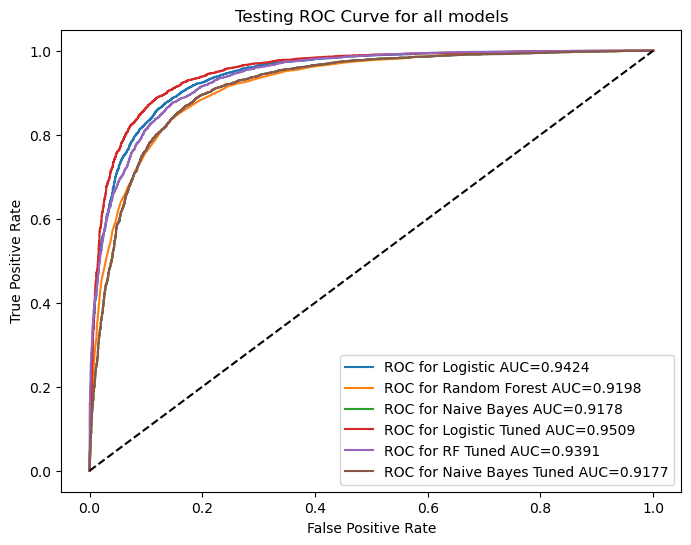

In [28]:
plot_roc(model_list,x_test,y_test)

In [29]:
#dump trained vectorizers and models
pickle.dump(cv, open('../models/cv.sav', 'wb'))
pickle.dump(logit_cv_bst, open('../models/logit_cv_bst.sav', 'wb'))
pickle.dump(rf_cv_bst, open('../models/rf_cv_bst.sav', 'wb'))
pickle.dump(nb_cv_bst, open('../models/nb_cv_bst.sav', 'wb'))

## 3. TF-IDF Vectorizer

### 3.1. Fit models

In [30]:
# TfidfVectorizer is equivalent to CountVectorizer followed by TfidfTransformer.
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df = 0.005)
x_train = tfidf.fit_transform(x_train_orig)
x_test = tfidf.transform(x_test_orig)

In [31]:
logit_tfidf = LogisticRegression(random_state=2022, max_iter=1000)
logit_tfidf.fit(x_train,y_train)
y_test_pred = logit_tfidf.predict(x_test)
print('---Logistic Regression---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

rf_tfidf = RandomForestClassifier(random_state=2022)
rf_tfidf.fit(x_train,y_train)
y_test_pred = rf_tfidf.predict(x_test)
print('---Random Forest---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

nb_tfidf = MultinomialNB()
nb_tfidf.fit(x_train,y_train)
y_test_pred = nb_tfidf.predict(x_test)
print('---Naive Bayes---')
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

---Logistic Regression---
[[4274  666]
 [ 498 4479]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4940
           1       0.87      0.90      0.89      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

---Random Forest---
[[4206  734]
 [ 759 4218]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4940
           1       0.85      0.85      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

---Naive Bayes---
[[4096  844]
 [ 598 4379]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4940
           1       0.84      0.88      0.86      4977

    accuracy                         

### 3.2. Hyperparameter Tuning

In [32]:
logit_tfidf_tune = LogisticRegression(random_state=2022, max_iter=2000) #increase max_iter to converge
logit_tfidf_gs = GridSearchCV(logit_tfidf_tune, param_logit, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
logit_tfidf_gs.fit(x_train, y_train)
logit_tfidf_bst = logit_tfidf_gs.best_estimator_
print('best score:', logit_tfidf_gs.best_score_)  # score of best_estimator on the left out data 
print('best parameters: ', logit_tfidf_gs.best_params_)

best score: 0.88388776816849
best parameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [33]:
rf_tfidf_tune = RandomForestClassifier(random_state=2022)
rf_tfidf_gs = RandomizedSearchCV(rf_tfidf_tune, param_rf, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
rf_tfidf_gs.fit(x_train, y_train)
rf_tfidf_bst = rf_tfidf_gs.best_estimator_
print('best score:', rf_tfidf_gs.best_score_)
print('best parameters: ', rf_tfidf_gs.best_params_)

best score: 0.8650874001024308
best parameters:  {'n_estimators': 400, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': False}


In [34]:
nb_tfidf_tune = MultinomialNB()
nb_tfidf_gs = GridSearchCV(nb_tfidf_tune, param_nb, scoring='f1', cv=StratifiedKFold(n_splits=5), n_jobs= -1)
nb_tfidf_gs.fit(x_train, y_train)
nb_tfidf_bst = nb_tfidf_gs.best_estimator_
print('best score:', nb_tfidf_gs.best_score_)
print('best parameters: ', nb_tfidf_gs.best_params_)

best score: 0.8552450892336013
best parameters:  {'alpha': 1.9000000000000001}


In [35]:
model_list = {'Logistic':logit_tfidf, 'Random Forest':rf_tfidf, 'Naive Bayes':nb_tfidf, 'Logistic Tuned':logit_tfidf_bst, 
        'RF Tuned':rf_tfidf_bst, 'Naive Bayes Tuned':nb_tfidf_bst}
tabulate_perf(model_list,x_train,y_train,x_test,y_test)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
0,Logistic,0.903441,0.882626,0.896904,0.870554,0.912493,0.899940,0.904631,0.885003,0.966026,0.954422
1,Random Forest,1.000000,0.849450,1.000000,0.851777,1.000000,0.847498,1.000000,0.849632,1.000000,0.925327
2,Naive Bayes,0.857885,0.854593,0.847033,0.838407,0.874818,0.879847,0.860701,0.858627,0.933601,0.930655
3,Logistic Tuned,0.903416,0.882525,0.896860,0.870385,0.912493,0.899940,0.904609,0.884916,0.966026,0.954422
4,RF Tuned,0.994428,0.862358,0.989069,0.839857,0.999950,0.896725,0.994480,0.867360,0.999989,0.939925
5,Naive Bayes Tuned,0.857734,0.854492,0.847090,0.838376,0.874366,0.879646,0.860512,0.858516,0.933565,0.930649


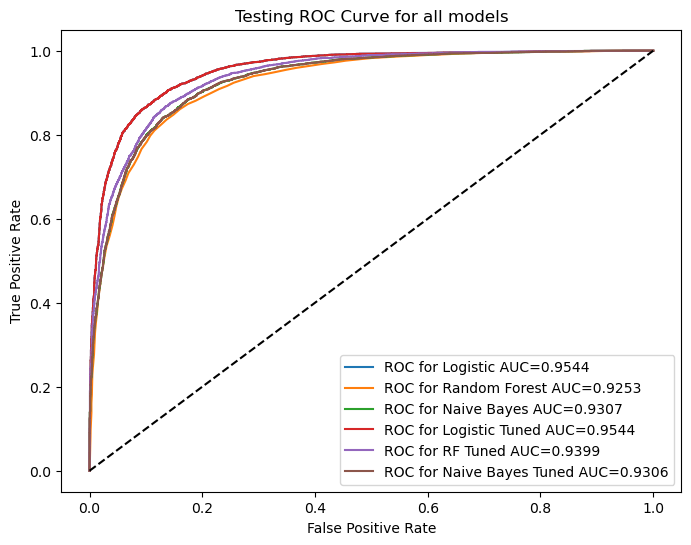

In [36]:
plot_roc(model_list,x_test,y_test)

In [37]:
#dump trained vectorizers and models
pickle.dump(tfidf, open('../models/tfidf.sav', 'wb'))
pickle.dump(logit_tfidf_bst, open('../models/logit_tfidf_bst.sav', 'wb'))
pickle.dump(rf_tfidf_bst, open('../models/rf_tfidf_bst.sav', 'wb'))
pickle.dump(nb_tfidf_bst, open('../models/nb_tfidf_bst.sav', 'wb'))

## 4. Feature importance

In [38]:
print(len(cv.vocabulary_))
print(len(tfidf.vocabulary_))

3032
3032


In [39]:
def get_top_n_gram(vec,data,n=None):
    sum_words = data.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
x_train_cv = cv.fit_transform(x_train_orig)
x_train_tfidf = tfidf.fit_transform(x_train_orig)

In [40]:
get_top_n_gram(cv,x_train_cv,10)

[('one', 42705),
 ('like', 34895),
 ('time', 24292),
 ('make', 23482),
 ('good', 23346),
 ('charact', 22148),
 ('get', 22104),
 ('see', 21838),
 ('watch', 21826),
 ('even', 19892)]

In [41]:
get_top_n_gram(tfidf,x_train_tfidf,10)

[('one', 1401.3285132699561),
 ('like', 1264.6705805749523),
 ('good', 1040.6815202491266),
 ('watch', 1032.4333192635863),
 ('time', 993.564483886688),
 ('see', 956.9896213395212),
 ('charact', 956.78163967184),
 ('make', 954.0478924153625),
 ('stori', 921.6241377406063),
 ('get', 915.1002177874492)]

In [42]:
logit_cv_feature=pd.DataFrame({'coef':logit_cv_bst.coef_[0], 'feature':cv.get_feature_names_out()})
logit_cv_feature.sort_values('coef',key=abs, ascending=False)[:20]

,coef,feature
2913,1.332083,well worth
2972,-1.259894,worst
2885,-1.221901,wast
186,-1.206357,aw
1249,1.165154,highli recommend
1990,-1.072530,poorli
2803,-1.052912,unfunni
1034,-1.013933,forgett
2149,0.999568,refresh
1659,-0.995251,mediocr


In [43]:
logit_tfidf_feature=pd.DataFrame({'coef':logit_tfidf_bst.coef_[0], 'feature':tfidf.get_feature_names_out()})
logit_tfidf_feature.sort_values('coef',key=abs, ascending=False)[:20]

,coef,feature
2972,-8.897363,worst
2885,-7.830962,wast
186,-7.583673,aw
196,-7.202862,bad
899,7.176605,excel
292,-6.903600,bore
1167,6.714627,great
710,-5.735074,disappoint
2645,-5.367386,terribl
1937,5.294091,perfect


Text(0.5, 0, 'Random Forest Feature Importance')

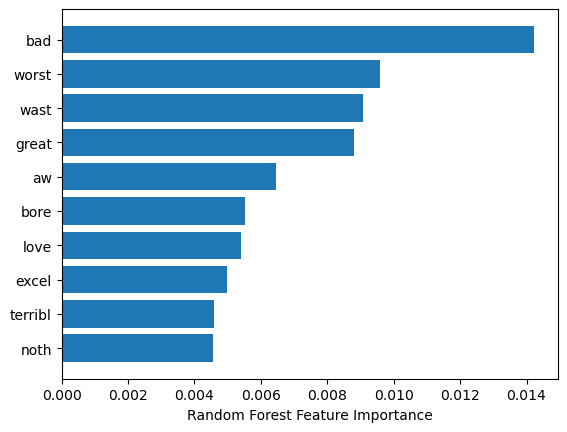

In [44]:
sorted_idx = rf_cv_bst.feature_importances_.argsort()[-10:]
plt.barh(cv.get_feature_names_out()[sorted_idx], rf_cv_bst.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

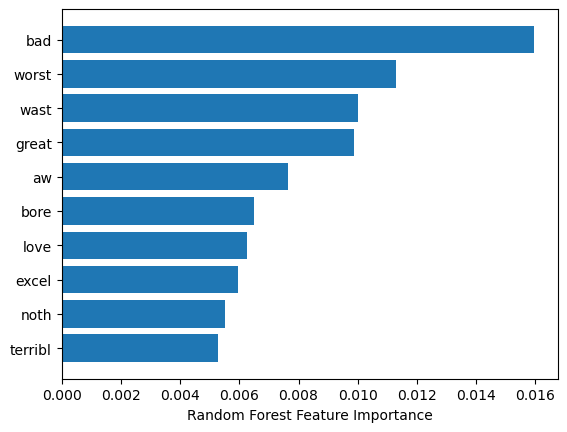

In [45]:
sorted_idx = rf_tfidf_bst.feature_importances_.argsort()[-10:]
plt.barh(tfidf.get_feature_names_out()[sorted_idx], rf_tfidf_bst.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [46]:
# calculate Count(xi| class)
count_feature_neg = nb_cv_bst.feature_count_[0]
count_feature_pos = nb_cv_bst.feature_count_[1]

# calculate Count(xi)
count_feature = [sum(x) for x in zip(nb_cv_bst.feature_count_[0], nb_cv_bst.feature_count_[1])]

# calculate Count(xi| class)) / Count(xi)
predictive_neg = count_feature_neg/count_feature
predictive_pos = count_feature_pos/count_feature

# get the rank of predictiveness, if same predictiveness then sort by count in the class
rank_neg = np.lexsort((count_feature_neg,predictive_neg))[::-1] # sort by predictiveness and then by count in negative reviews
rank_pos = np.lexsort((count_feature_pos,predictive_pos))[::-1] # sort by predictiveness and then by count in positive reviews

# print top 10 tokens based on sorted value of P(xi| class) / P(xi)
print('Top 10 most predictive tokens of negative reviews \n',cv.get_feature_names_out()[rank_neg[:10]])
print('Top 10 most predictive tokens of positive reviews \n',cv.get_feature_names_out()[rank_pos[:10]])

Top 10 most predictive tokens of negative reviews 
 ['worst ive' 'avoid cost' 'worst ever' 'one worst' 'piec crap'
 'wast money' 'dont wast' 'time money' 'bad bad' 'wast time']
Top 10 most predictive tokens of positive reviews 
 ['well worth' 'highli recommend' 'underr' 'one best' 'must see'
 'great job' 'unforgett' 'superb' 'brilliantli' 'definit worth']


In [47]:
# calculate Count(xi| class)
count_feature_neg = nb_tfidf_bst.feature_count_[0]
count_feature_pos = nb_tfidf_bst.feature_count_[1]

# calculate Count(xi)
count_feature = [sum(x) for x in zip(nb_tfidf_bst.feature_count_[0], nb_tfidf_bst.feature_count_[1])]

# calculate Count(xi| class)) / Count(xi)
predictive_neg = count_feature_neg/count_feature
predictive_pos = count_feature_pos/count_feature

# get the rank of predictiveness, if same predictiveness then sort by count in the class
rank_neg = np.lexsort((count_feature_neg,predictive_neg))[::-1] # sort by predictiveness and then by count in negative reviews
rank_pos = np.lexsort((count_feature_pos,predictive_pos))[::-1] # sort by predictiveness and then by count in positive reviews

# print top 10 tokens based on sorted value of P(xi| class) / P(xi)
print('Top 10 most predictive tokens of negative reviews \n',tfidf.get_feature_names_out()[rank_neg[:10]])
print('Top 10 most predictive tokens of positive reviews \n',tfidf.get_feature_names_out()[rank_pos[:10]])

Top 10 most predictive tokens of negative reviews 
 ['worst ive' 'avoid cost' 'worst ever' 'wast money' 'one worst'
 'dont wast' 'piec crap' 'bad bad' 'wast time' 'time money']
Top 10 most predictive tokens of positive reviews 
 ['well worth' 'highli recommend' 'underr' 'unforgett' 'must see'
 'great job' 'one best' 'superb' 'brilliantli' 'refresh']


## 5. Error Analysis on final model 

In [48]:
def error_check(name, model):
    print('-----', name, '-----')
    # get predicted probability of positive
    pred_proba = pd.DataFrame({'pred_proba_pos':model.predict_proba(x_test)[:,1],'pred_sentiment':model.predict(x_test),
                'class':y_test,'review':df.loc[y_test.index,'review'], 'cleaned':x_test_orig,'length':df.loc[y_test.index,'length']})
    # get FP cases (predicted as positve but actually negative) and sort the predicted positive probability in descending order
    FP = pred_proba[(pred_proba['pred_sentiment']==1) & (pred_proba['class']==0)].sort_values('pred_proba_pos', ascending=False)
    print('FP cases')
    display(FP[:3])
    # get FN cases (predicted as negative but actually positive) and sort the predicted positive probability in ascending order
    FN = pred_proba[(pred_proba['pred_sentiment']==0) & (pred_proba['class']==1)].sort_values('pred_proba_pos')
    print('FN cases')
    display(FN[:3])

    return FP[:3], FN[:3]

In [49]:
def error_analysis(error_df):
    for i in range(len(error_df)):    
        ea_df = pd.DataFrame({'feature':error_df['cleaned'].iloc[i].split()}).explode('feature')
        ea_df = pd.merge(ea_df, logit_tfidf_feature, "inner", on = 'feature')
        ea_df.sort_values('coef',key=abs, ascending=False, inplace=True)
        print('--------------------------------------')
        print(ea_df.head(20))

In [50]:
FP, FN = error_check('Logistic TFIDF Tuned', logit_tfidf_bst)

----- Logistic TFIDF Tuned -----
FP cases


,pred_proba_pos,pred_sentiment,class,review,cleaned,length
1216,0.992903,1,0,"Mickey Rourke hunts Diane Lane in Elmore Leonard's Killshot It is not like Mickey Rourke ever really disappeared. He has had a steady string of appearances before he burst back on the scene. He was memorable in: Domino, Sin City, Man on Fire, Once Upon a Time in Mexico, and Get Carter. But in his powerful dramatic performance in The Wrestler (2008), we see a full blown presentation of the character only hinted at in Get Carter. Whenever we get to know him, Rourke remains a cool, but sleazy, muscle bound slim ball. This is an Elmore Leonard story, and production. Leonard wrote such notable movies as taunt western thriller 3:10 to Yuma, Be Cool, Jackie Brown, Get Shorty, 52 Pick-Up, and Joe Kidd. This means that we get tough guys, some good, some not so good. It also means we get tight, realistic plots with characters doing what is best for them in each situation, weaving complications into violent conclusions. Killshot is no different. Tough, slim ball killer Rourke stalks unhappily married witness Lane. Think History of Violence meets No Country for Old Men. It is not as intense, bloody or gory as those two, but it is almost as good. If you like those two, including David Croneberg's equally wonderful Eastern Promises, you will like Killshot also. Director John Madden has not done a lot of movies. His last few were enjoyable, if not successful: Proof, Captain Corelli's Mandolin and Shakespeare in Love. Diana Lane hasn't had a powerful movie role since she and Richard Gere gave incredible performances in Unfaithful. Lately she is charming and appealing in romantic stories such as Nights in Rodanthe, Must Love Dogs, and Under the Tuscan Sun. Here she is right on mark, balancing her sexy appeal with reserved tension. This is a small part for Rosario Dawson. Yet Dawson does a good job with it. You see a lot more of Lane, including an underwear scene to rival Sigourney Weaver in Aliens and Nicole Kidman in Eyes Wide Shut. While you are in the crime drama section, also pick up Kiss, Kiss, Bang, Bang, and Gone Baby Gone, and Before the Devil Knows Your Dead. The last has wonderful performances by Phillip Seymour Hoffman, Ethan Hawke, Marisa Tomei and Albert Finney. Killshot flopped at the box office. More is our luck. It is certainly worth a 3-4 dollar rental, if you like this genre. 6/20/2009",mickey rourk hunt dian lane elmor leonard killshot like mickey rourk ever realli disappear steadi string appear burst back scene memor domino sin citi man fire upon time mexico get carter power dramat perform wrestler see full blown present charact hint get carter whenev get know rourk remain cool sleazi muscl bound slim ball elmor leonard stori product leonard wrote notabl taunt western thriller yuma cool jacki brown get shorti pickup joe kidd mean get tough guy good good also mean get tight realist plot charact best situat weav complic violent conclus killshot differ tough slim ball killer rourk stalk unhappili marri wit lane think histori violenc meet countri old men intens bloodi gori two almost good like two includ david croneberg equal wonder eastern promis like killshot also director john madden done lot last enjoy success proof captain corelli mandolin shakespear love diana lane hasnt power role sinc richard gere gave incred perform unfaith late charm appeal romant stori night rodanth must love dog tuscan sun right mark balanc sexi appeal reserv tension small part rosario dawson yet dawson good job see lot lane includ underwear scene rival sigourney weaver alien nicol kidman eye wide shut crime drama section also pick kiss kiss bang bang gone babi gone devil know dead last wonder perform phillip seymour hoffman ethan hawk marisa tomei albert finney killshot flop box offic luck certainli worth dollar rental like genr,1447
12073,0.983536,1,0,"I went to see this 3 nights ago here in Cork, Ireland. It was the world premiere of it, in the tiny cinema in the Triske

FN cases


,pred_proba_pos,pred_sentiment,class,review,cleaned,length
14081,0.002785,0,1,"I wouldn't go so far as to not recommend this movie, since the only problems I have with it are due to an overexposure to the plot devices used in the movie - the sort of things common to every kids movie ever made it seems. That doesn't make it bad, just not something I'd go far. It is a little saccharine, so I might say that for the most part anyone looking for something with a little more wit could be disappointed in an obviously for-kids movie like this. However, all of that goes out the window when that squirrel (the one in all the trailers) comes on-screen. His time is limited, but it seems apparent that the decision makers had the wisdom to tell these guys 'hey, could you stick in a little more squirrel?' every time it's getting intolerably dull. That doesn't save the movie, but you can leave saying 'at least there was one aspect where I couldn't stop laughing.' And of course, visually it won't disappoint, but that's almost a given with Pixar flicks. Of all of their stuff, I'd put this at the bottom...but that isn't in itself bad.",wouldnt go far recommend sinc problem due overexposur plot devic use sort thing common everi kid ever made seem doesnt make bad someth id go far littl saccharin might say part anyon look someth littl wit could disappoint obvious forkid like howev goe window squirrel one trailer come onscreen time limit seem appar decis maker wisdom tell guy hey could stick littl squirrel everi time get intoler dull doesnt save leav say least one aspect couldnt stop laugh cours visual wont disappoint that almost given pixar flick stuff id put bottombut isnt bad,549
35783,0.003605,0,1,"This low-budget erotic thriller that has some good points, but a lot more bad one. The plot revolves around a female lawyer trying to clear her lover who is accused of murdering his wife. Being a soft-core film, that entails her going undercover at a strip club and having sex with possible suspects. As plots go for this type of genre, not to bad. The script is okay, and the story makes enough sense for someone up at 2 AM watching this not to notice too many plot holes. But everything else in the film seems cheap. The lead actors aren't that bad, but pretty much all the supporting ones are unbelievably bad (one girl seems like she is drunk and/or high). The cinematography is badly lit, with everything looking grainy and ugly. The sound is so terrible that you can barely hear what people are saying. The worst thing in this movie is the reason you're watching it-the sex. The reason people watch these things is for hot sex scenes featuring really hot girls in Red Shoe Diary situations. The sex scenes aren't hot they're sleazy, shot in that porno style where everything is just a master shot of two people going at it. The woman also look like they are refuges from a porn shoot. I'm not trying to be rude or mean here, but they all have that breast implants and a burned out/weathered look. Even the title, ""Deviant Obsession"", sounds like a Hardcore flick. Not that I don't have anything against porn - in fact I love it. But I want my soft-core and my hard-core separate. What ever happened to actresses like Shannon Tweed, Jacqueline Lovell, Shannon Whirry and Kim Dawson? Women that could act and who would totally arouse you? And what happened to B erotic thrillers like Body Chemistry, Nighteyes and even Stripped to Kill. Sure, none of these where masterpieces, but at least they felt like movies. Plus, they were pushing the envelope, going beyond Hollywood's relatively prude stance on sex, sexual obsessions and perversions. Now they just make hard-core films without the hard-core sex.",lowbudget erot thriller good point lot bad one plot revolv around femal lawyer tri clear lover accus murder wife softcor entail go undercov strip club sex possibl suspect plot go type genr bad script okay stori make enough sens someon watch notic mani plot hole everyth els seem c

In [51]:
logit_tfidf_feature=pd.DataFrame({'coef':logit_tfidf_bst.coef_[0], 'feature':tfidf.get_feature_names_out()})
logit_tfidf_feature.head(10)

,coef,feature
0,0.140448,abandon
1,-0.243161,abil
2,1.084466,abl
3,-0.140503,absolut
4,-1.582590,absolut noth
5,-1.467832,absurd
6,-0.221740,abus
7,0.051112,academi
8,0.495741,academi award
9,-1.466925,accent


In [52]:
error_analysis(FP)

--------------------------------------
      feature      coef
111     enjoy  4.680616
116      love  4.487227
117      love  4.487227
74       best  4.151497
72    realist  2.839297
68       also  2.481701
69       also  2.481701
70       also  2.481701
33        see  2.298696
32        see  2.298696
64       good  2.297230
67       good  2.297230
65       good  2.297230
66       good  2.297230
104  director -2.243179
29    perform  2.118208
30    perform  2.118208
31    perform  2.118208
91     intens  2.105578
123    incred  2.096689
--------------------------------------
       feature      coef
16       excel  7.176605
17       excel  7.176605
38   entertain  3.365814
35      script -3.236601
103     highli  2.612315
2          see  2.298696
1          see  2.298696
75        good  2.297230
19         bit  2.227213
18         bit  2.227213
104  recommend  2.086494
72     sometim  1.984794
32      wonder  1.923107
31      wonder  1.923107
5        world  1.745844
26         act -1.

In [53]:
error_analysis(FN)

--------------------------------------
       feature      coef
26         bad -7.202862
25         bad -7.202862
43  disappoint -5.735074
44  disappoint -5.735074
65        dull -4.902084
66        save -4.108838
68       least -2.980039
70     couldnt -2.507432
5    recommend  2.086494
9         plot -2.070636
42       could -2.024567
41       could -2.024567
20        seem -1.983579
21        seem -1.983579
39        look -1.974997
4          far -1.952906
3          far -1.952906
7      problem -1.836641
57       appar -1.836502
59       maker -1.682669
--------------------------------------
        feature      coef
101       worst -8.897363
11          bad -7.202862
8           bad -7.202862
9           bad -7.202862
10          bad -7.202862
94      terribl -5.367386
142        love  4.487227
87        badli -3.320523
46       script -3.236601
161       least -2.980039
153       would -2.970652
66        cheap -2.852730
159        none -2.689761
160  masterpiec  2.654404
23     